In [ ]:
# GPU Access 
#!nvidia-smi

### Install YOLO11 via Ultralytics

In [4]:
!pip install ultralytics supervision roboflow

from IPython import display
display.clear_output()

!pip install ultralytics --quiet
import ultralytics
ultralytics.checks()

Ultralytics 8.3.51 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.6/8062.4 GB disk)


In [6]:
# Save the API key in Kaggle
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("my_api_key")

In [7]:
# Roboflow Dataset API Code
!pip install roboflow --quiet
from roboflow import Roboflow

rf = Roboflow(secret_value_0)

project = rf.workspace("duyguj").project("american-sign-language-letters-vouo0")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov11:: 100%|██████████| 2424/2424 [00:00<00:00, 9384.68it/s]


In [8]:
# Changing to the working directory in Kaggle
%cd /kaggle/working

# Training the YOLO model
!yolo task=detect mode=train model=yolo11n.pt data=/kaggle/working/American-Sign-Language-Letters-1/data.yaml epochs=10 imgsz=640 plots=True

#Results saved to runs/detect/train
#Learn more at https://docs.ultralytics.com/modes/train

/kaggle/working
100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 98.6MB/s]
Ultralytics 8.3.51 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/American-Sign-Language-Letters-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

In [9]:
# The list of files from the completed training is saved;
!ls /kaggle/working/runs/detect/train/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
confusion_matrix_normalized.png			   val_batch1_labels.jpg
events.out.tfevents.1734552280.f51f3b48275e.103.0  val_batch1_pred.jpg
labels.jpg					   val_batch2_labels.jpg
labels_correlogram.jpg				   val_batch2_pred.jpg
results.csv					   weights


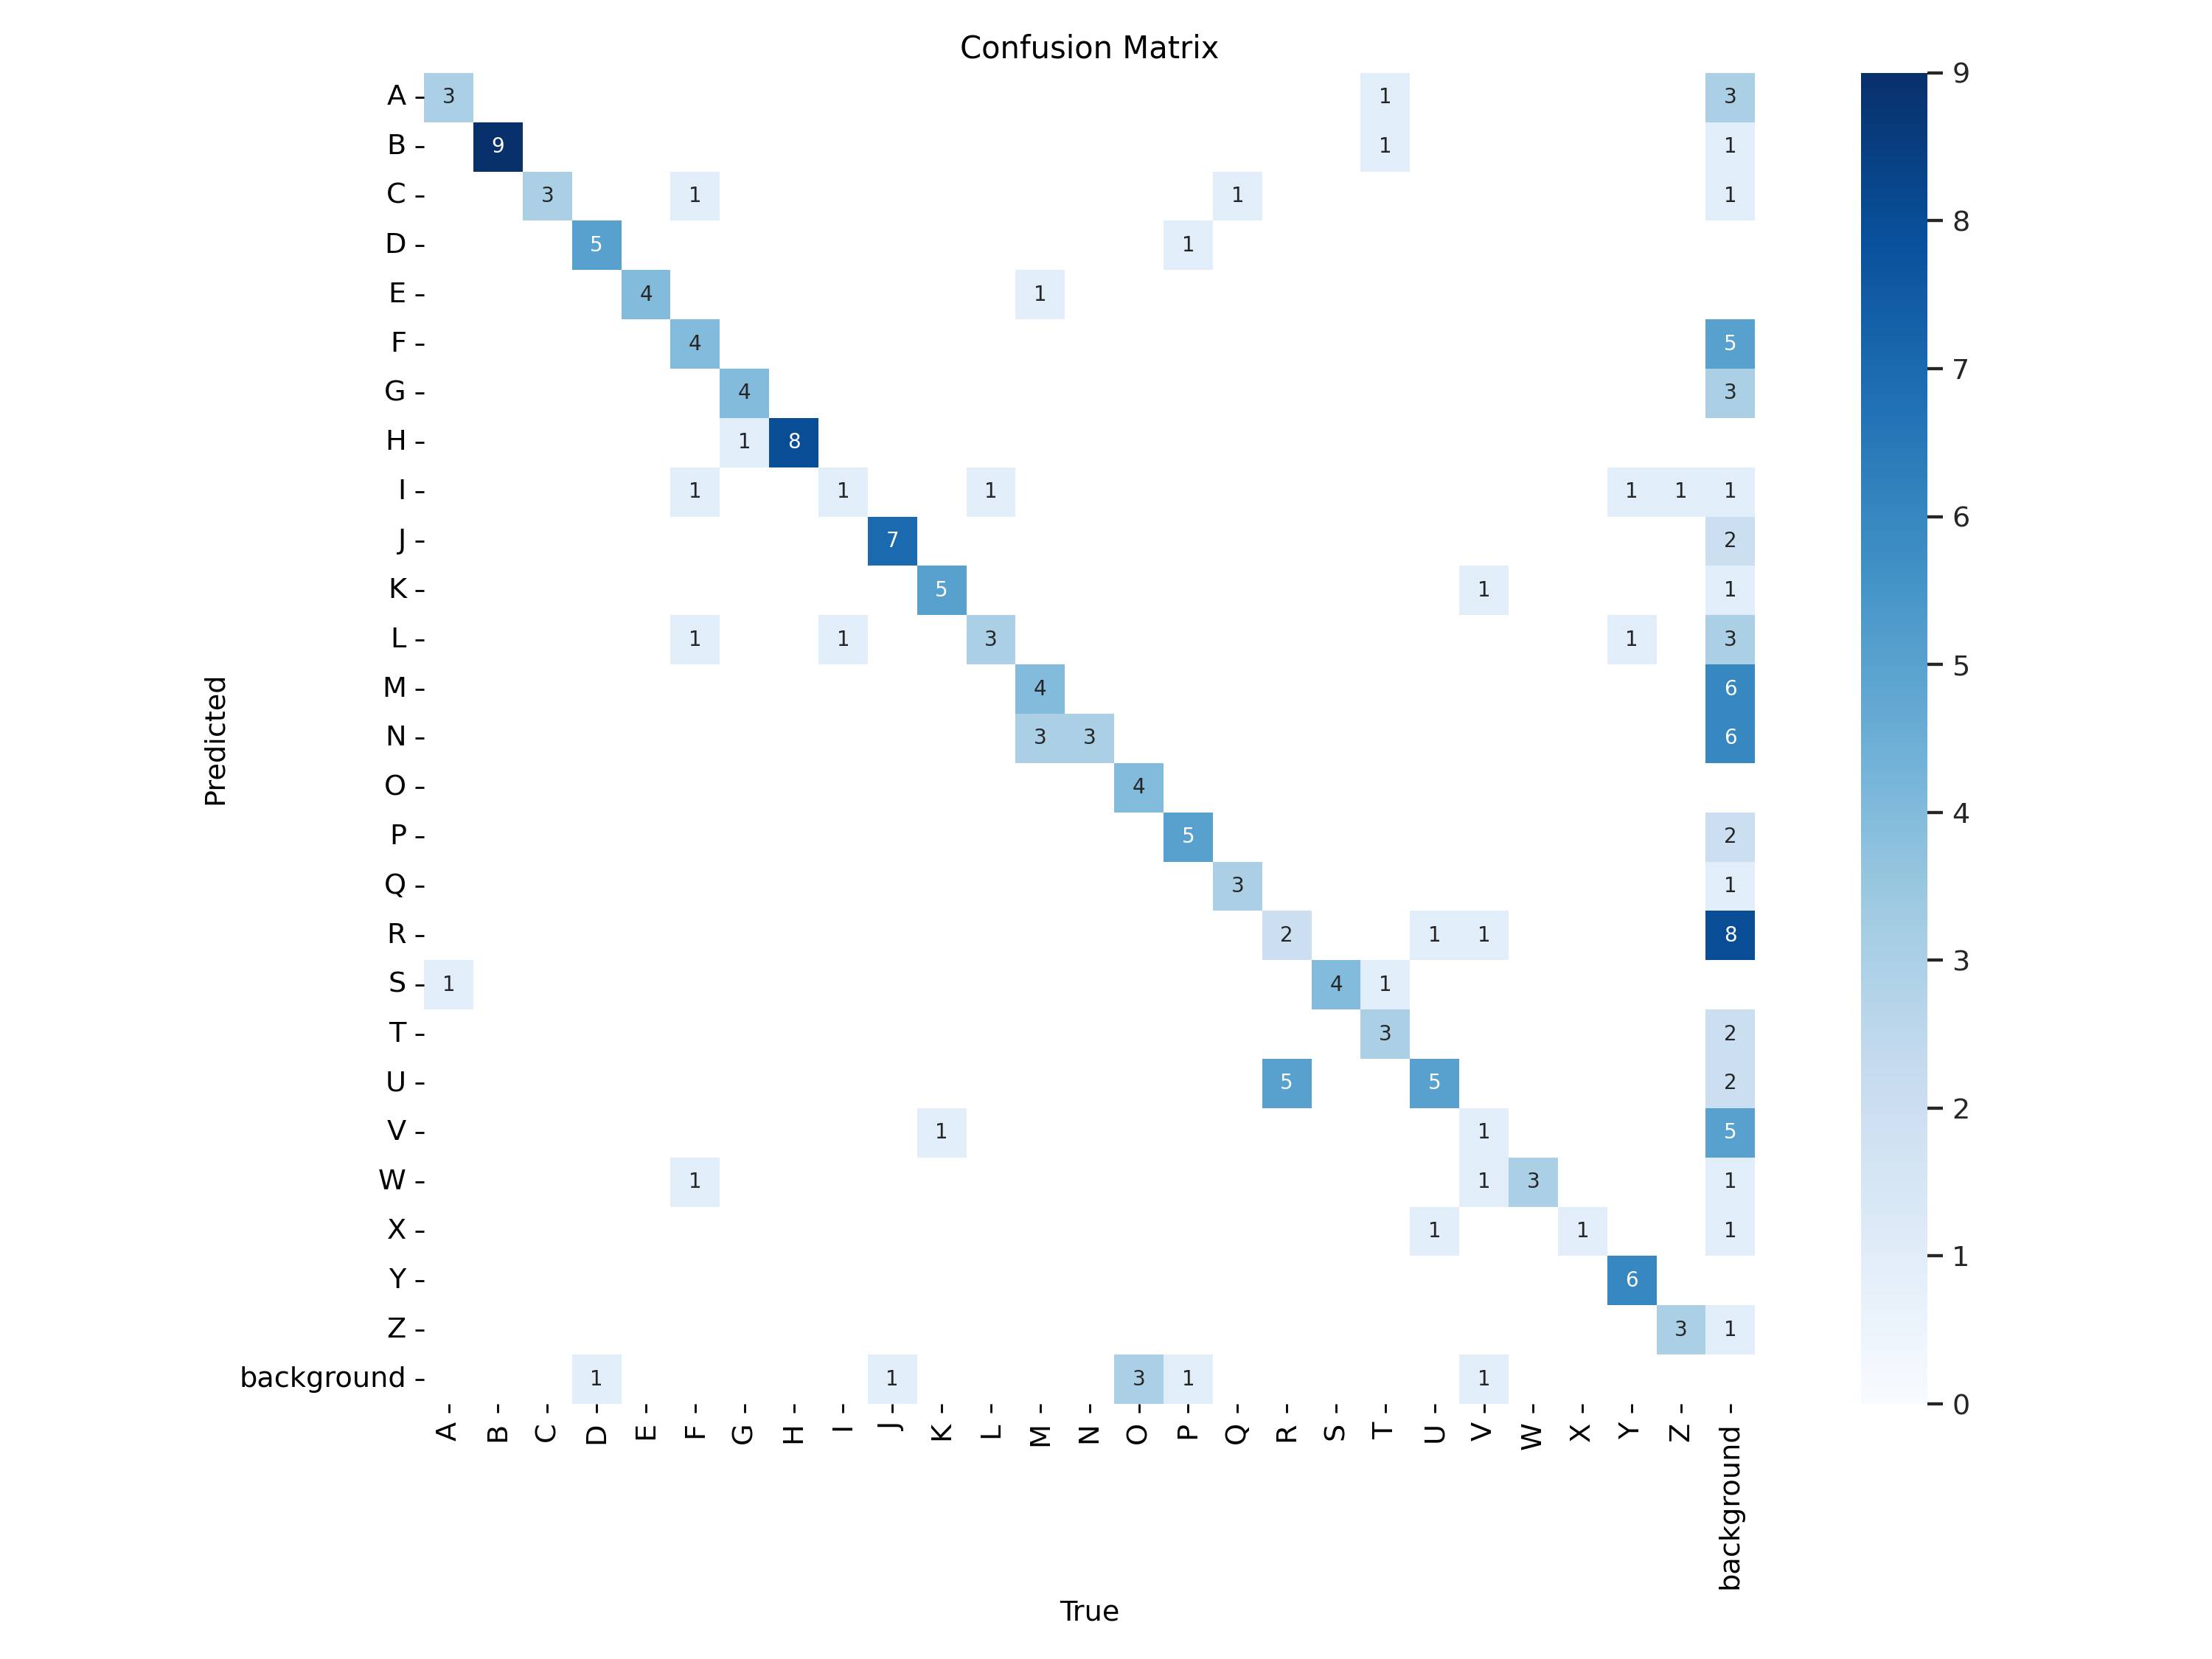

In [10]:
from IPython.display import Image as IPyImage

# Display the confusion matrix image from the specified directory in Kaggle
IPyImage(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', width=1000)

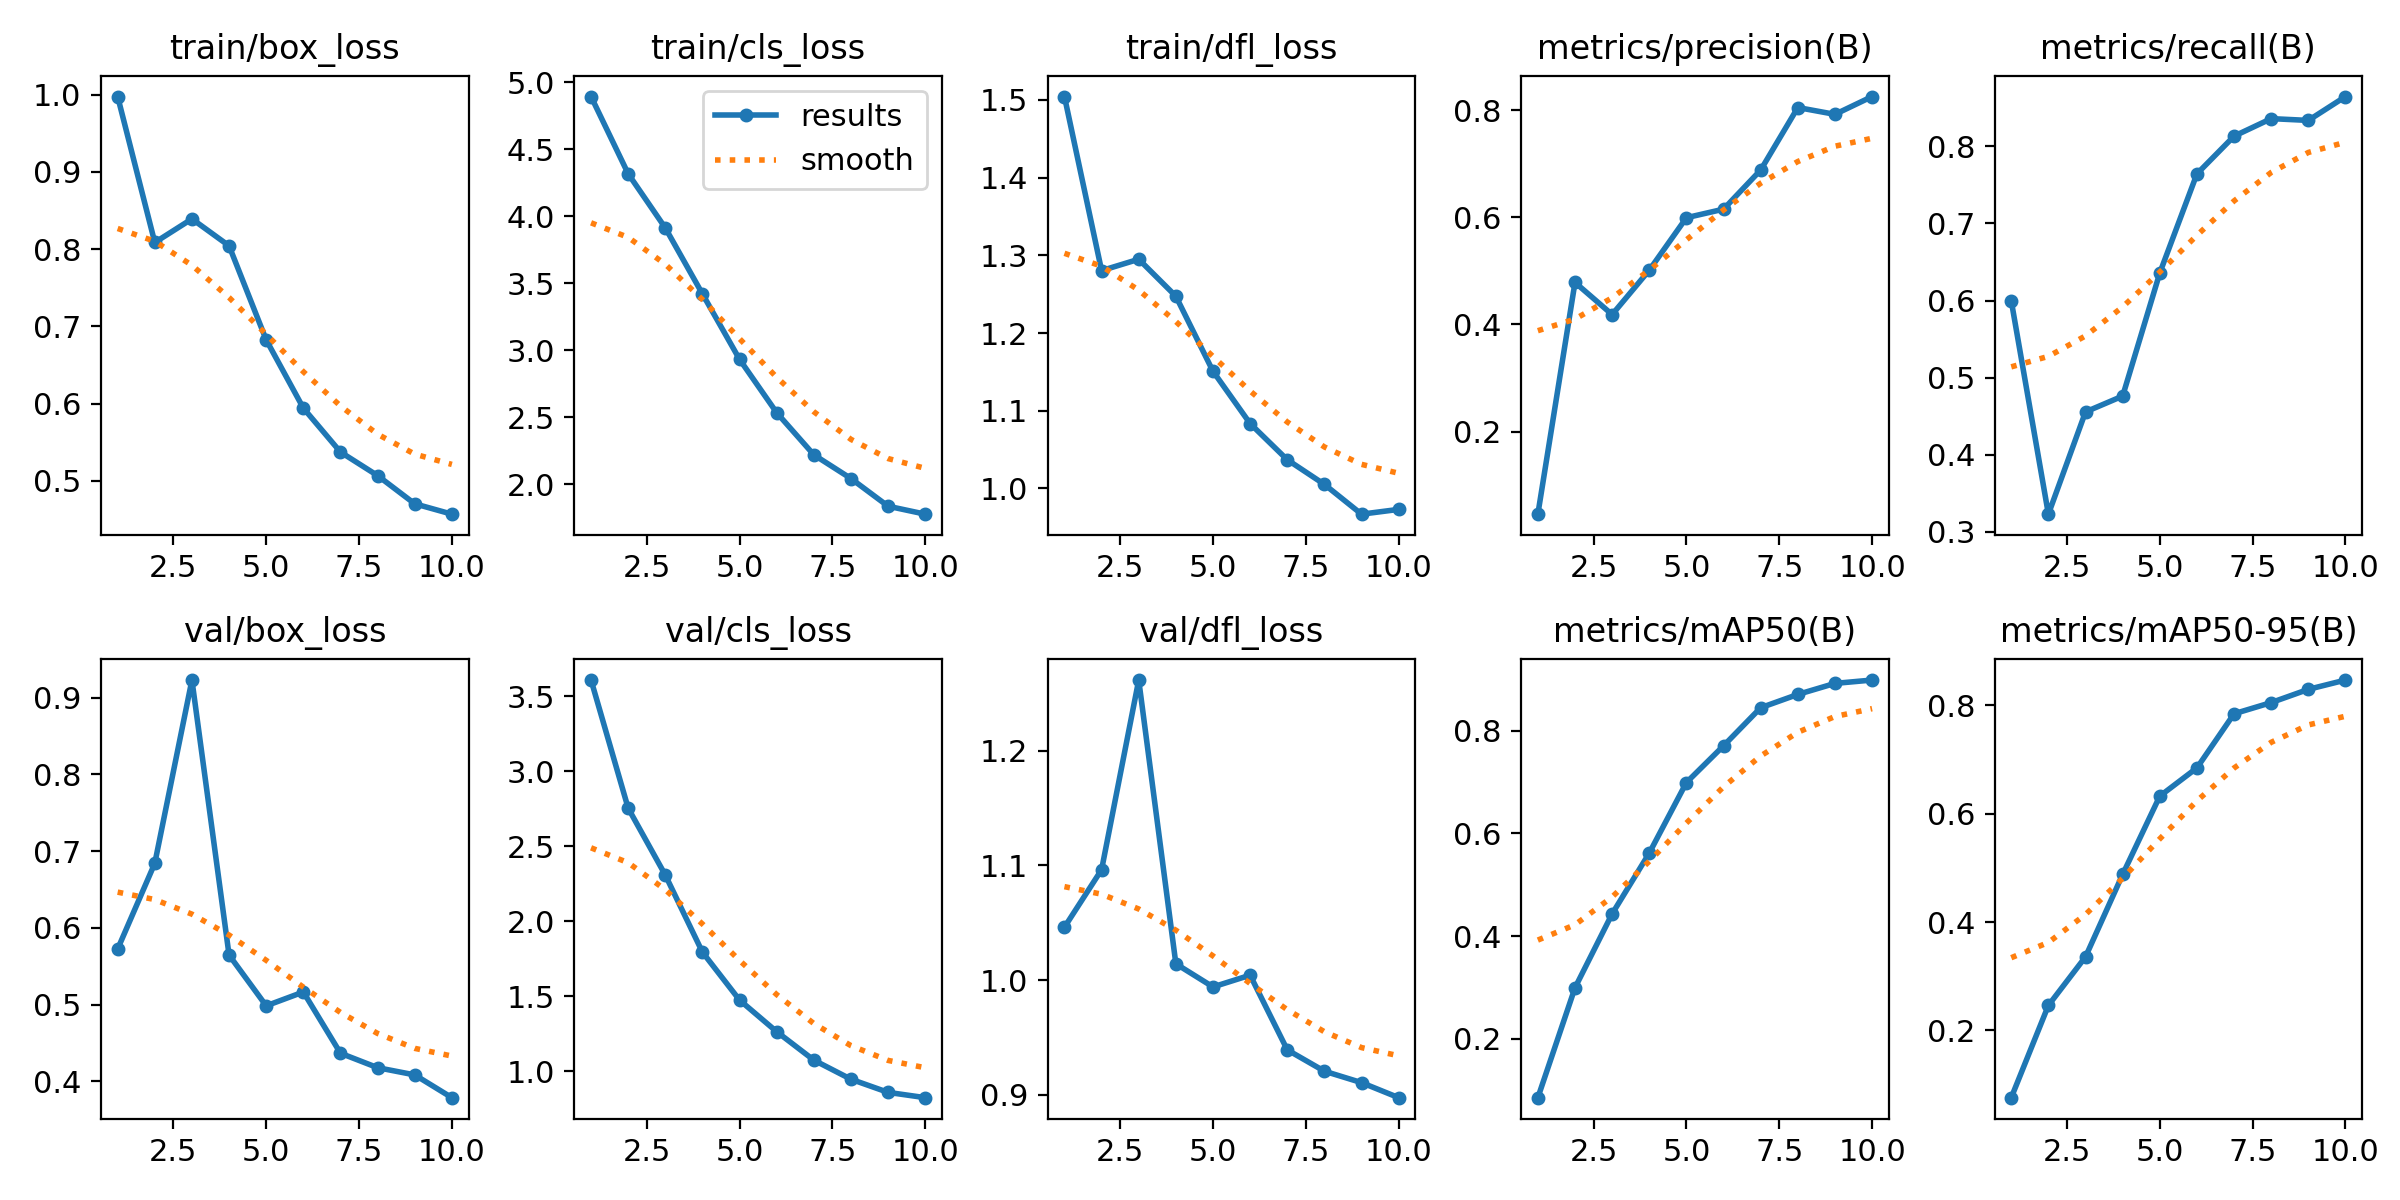

In [11]:
IPyImage(filename=f'/kaggle/working/runs/detect/train/results.png', width=1000)

In [3]:
IPyImage(filename=f'/kaggle/working/runs/detect/labels.jpg', width=1000)

NameError: name 'IPyImage' is not defined

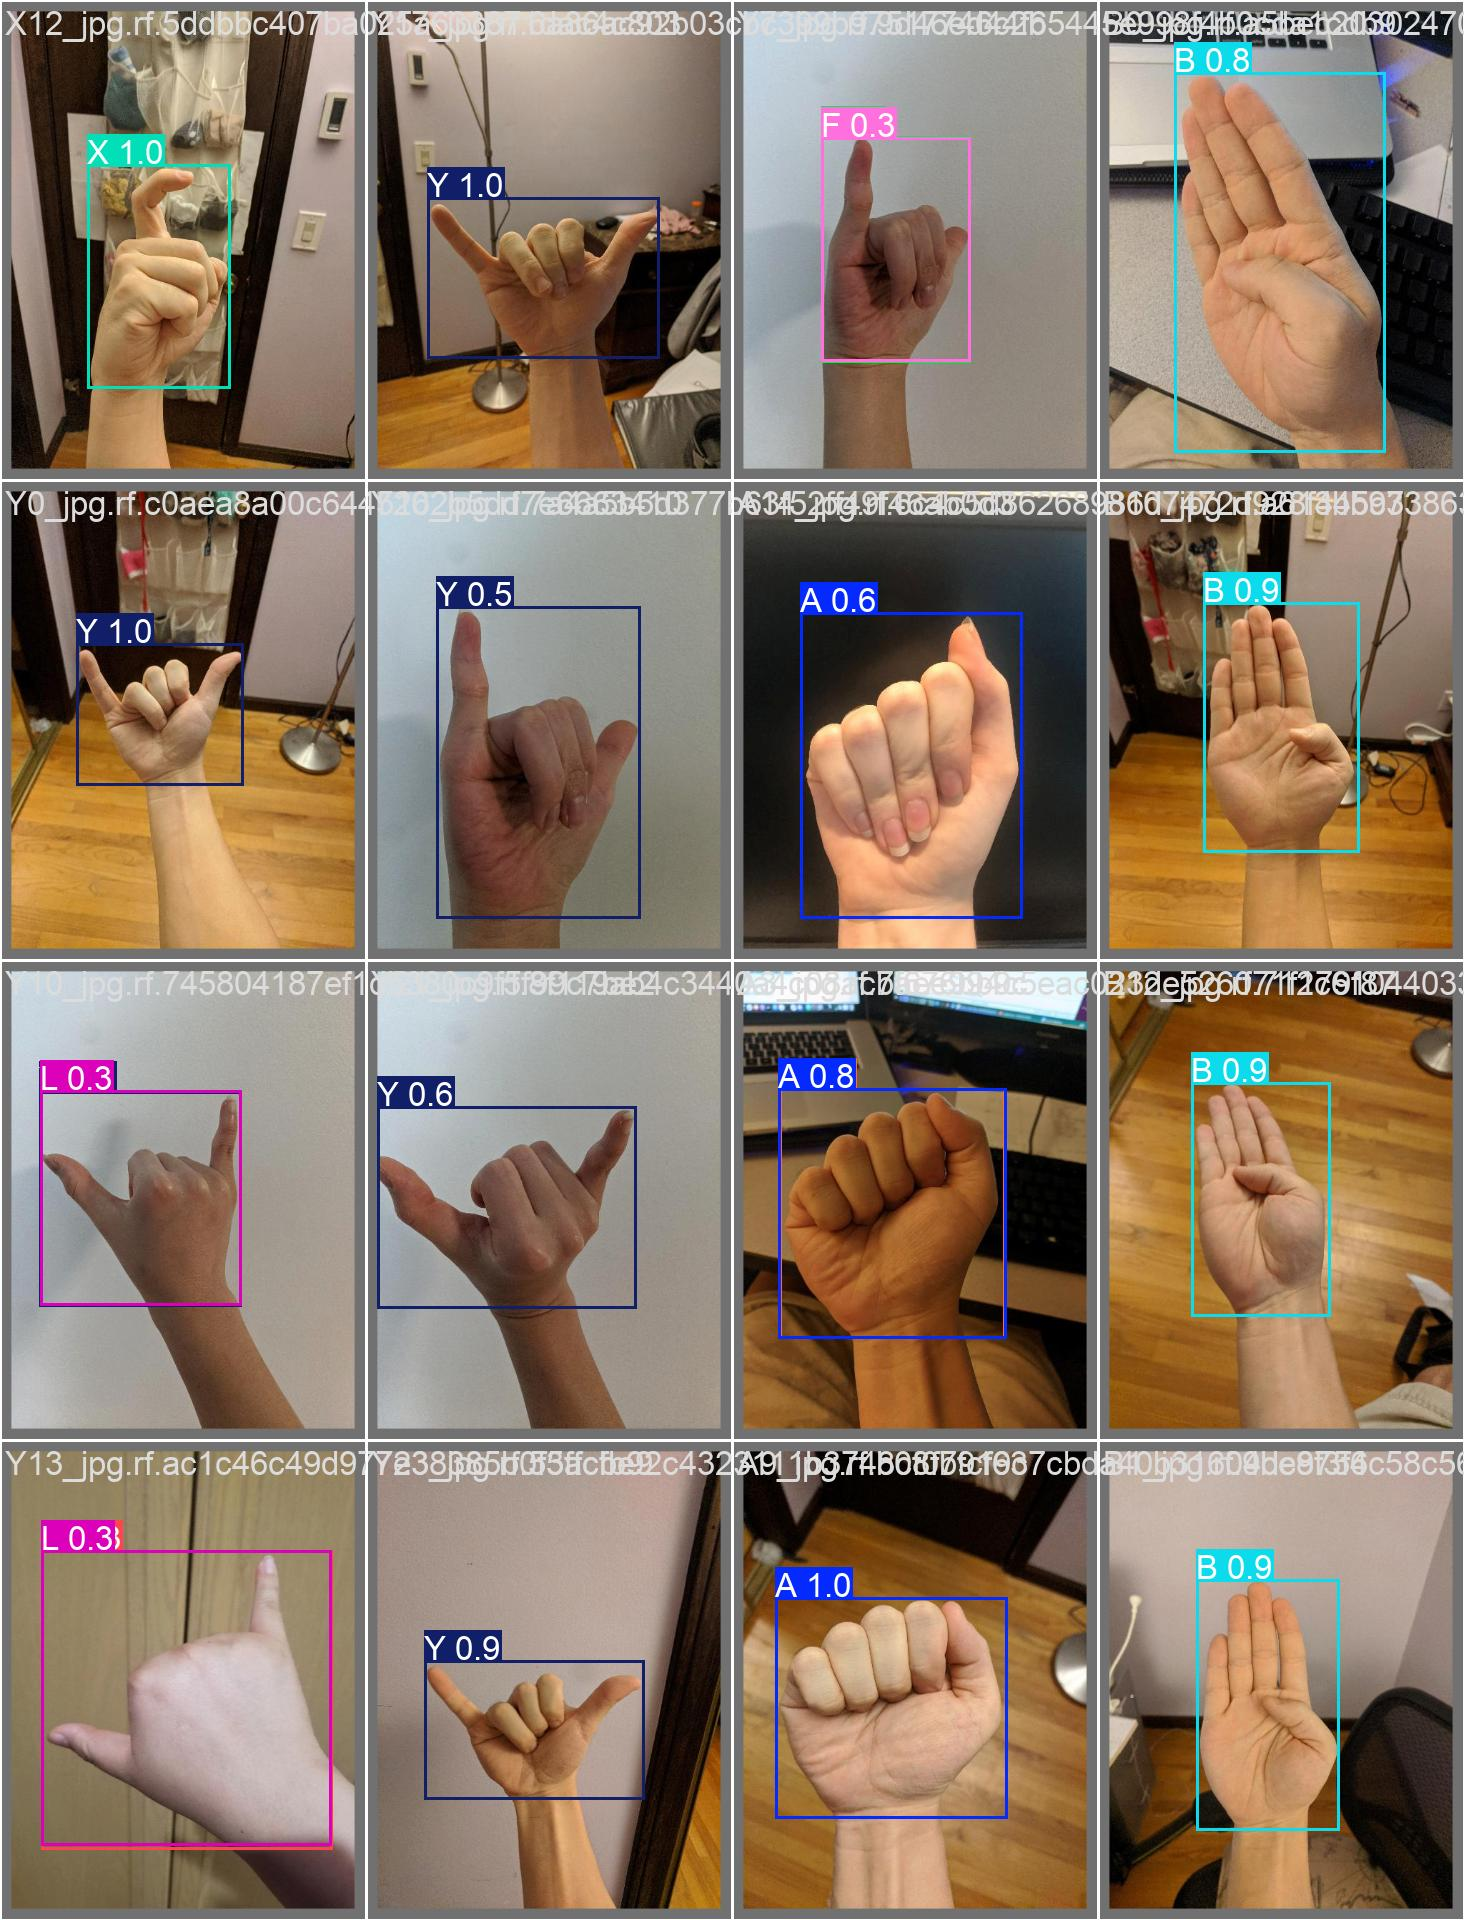

In [12]:
IPyImage(filename=f'/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [13]:
# Run the validation task using YOLO in Kaggle
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/American-Sign-Language-Letters-1/data.yaml

Ultralytics 8.3.51 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/American-Sign-Language-Letters-1/valid/labels.cach
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        141        141      0.826      0.864      0.898      0.848
                     A          4          4      0.794          1      0.945      0.907
                     B          9          9      0.881          1      0.995      0.925
                     C          3          3      0.713          1      0.995      0.951
                     D          6          6      0.809      0.833      0.915      0.881
                     E          4          4      0.953          1      0.995      0.995
                     F          8          8          1      0.737      0.923      0.908
                     G          5          5

In [14]:
# Run the prediction task on Test Data
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/American-Sign-Language-Letters-1/test/images save=True

#Results saved to runs/detect/predict
#💡 Learn more at https://docs.ultralytics.com/modes/predict

Ultralytics 8.3.51 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs

image 1/69 /kaggle/working/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.32b37dafb1697aedc8cf0c8c9b94c2de.jpg: 640x480 1 A, 41.8ms
image 2/69 /kaggle/working/American-Sign-Language-Letters-1/test/images/B14_jpg.rf.832681456547ed123b00a0d184c3cede.jpg: 640x480 1 B, 8.3ms
image 3/69 /kaggle/working/American-Sign-Language-Letters-1/test/images/B15_jpg.rf.56b1ab35b4bcd2a80fdb1d0a89d61e55.jpg: 640x480 1 B, 8.9ms
image 4/69 /kaggle/working/American-Sign-Language-Letters-1/test/images/B19_jpg.rf.97c88cb7ab8e5dab6977a87f417d5c22.jpg: 640x480 1 B, 7.8ms
image 5/69 /kaggle/working/American-Sign-Language-Letters-1/test/images/C17_jpg.rf.d0e4d411e11387230350ecf46922a91e.jpg: 640x480 1 C, 7.3ms
image 6/69 /kaggle/working/American-Sign-Language-Letters-1/test/images/C19_jpg.rf.78aaeecc2848e5e78a8eff72e652c55c.jpg: 640x48

## Prediction with Random Images

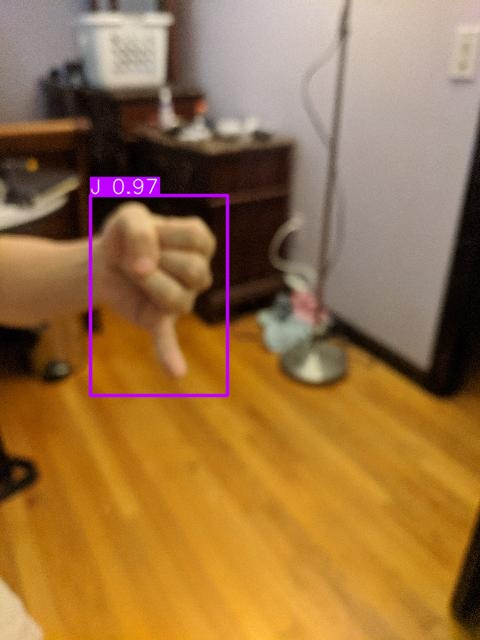

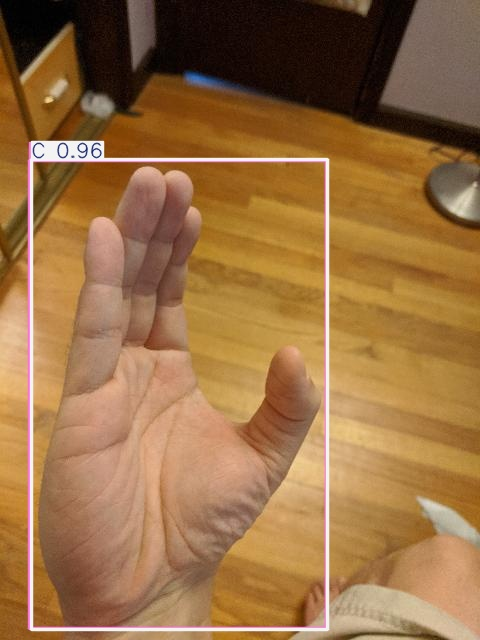

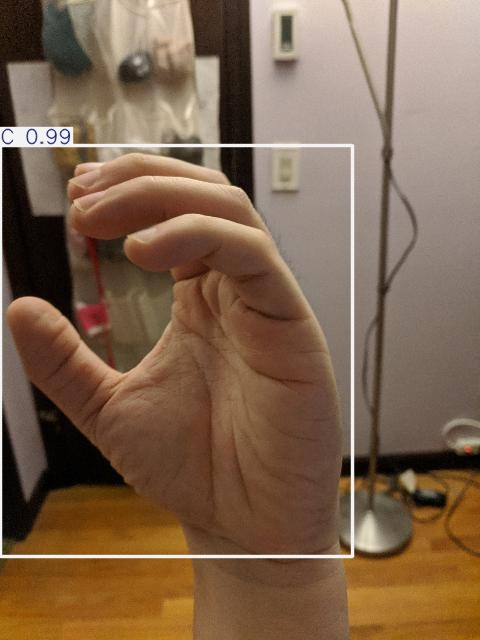

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Get the latest prediction folder for detection in Kaggle
latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)

# Display images from the prediction folder
for img in glob.glob(f'{latest_folder}/*.jpg')[15:18]:
    display(IPyImage(filename=img, width=300))